In [1]:
import shap
import joblib
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = joblib.load('../../models/data.joblib')

In [4]:
X_train, y_train, X_test, y_test = data

In [5]:
model = joblib.load('../../models/LR.joblib') 

We created Decision tree classifier since our model is not supported by tree explainer

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
tree_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

# Tree Explainer

In [8]:
explainer = shap.TreeExplainer(tree_model)

# Calculate Shap values
shap_values = explainer.shap_values(X_train[0:100])
print(shap_values)

[array([[ 1.65554928e-03, -9.68131470e-04,  1.64153565e-03, ...,
         6.55685077e-04, -2.37007306e-06, -4.69594773e-04],
       [ 6.21720183e-05, -1.01067161e-03,  6.22720987e-03, ...,
         1.67036322e-05, -1.15014422e-05, -9.18593148e-05],
       [ 6.66128969e-02,  6.00347014e-06, -1.66626113e-03, ...,
         2.91649602e-03,  4.84373735e-06, -2.54510367e-04],
       ...,
       [ 6.05498394e-03, -9.98852651e-04, -1.35326268e-02, ...,
         3.72465101e-05, -2.50409702e-05, -3.92574653e-04],
       [-8.54537586e-03, -1.99122006e-05,  1.89004185e-02, ...,
         2.18702985e-05, -1.91336172e-05, -2.07541705e-04],
       [ 7.98604211e-02, -1.10998382e-03,  2.46495659e-02, ...,
         1.85958768e-05,  1.30960973e-05, -3.17754563e-04]]), array([[ 3.26816082e-03,  2.00202547e-04, -6.17371250e-03, ...,
         1.35895652e-05,  1.49803722e-04, -6.46838531e-04],
       [ 6.95754914e-04,  1.29094274e-04, -2.08427241e-03, ...,
         2.22489276e-05,  1.64733783e-04, -2.69321446

# Visualize explanations for a specific point

In [9]:
data_for_prediction = X_train.iloc[1].values

In [17]:
y_train[1]

1

In [12]:
shap.initjs()

In [15]:
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

In [19]:
shap.force_plot(explainer.expected_value[5], shap_values[5], data_for_prediction)

In [20]:
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

# Visualize explanations for all points of the data set

In [21]:
data_for_prediction = X_train.iloc[:100].values
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

# Visualize a summary plot for each class on the representation of dataset

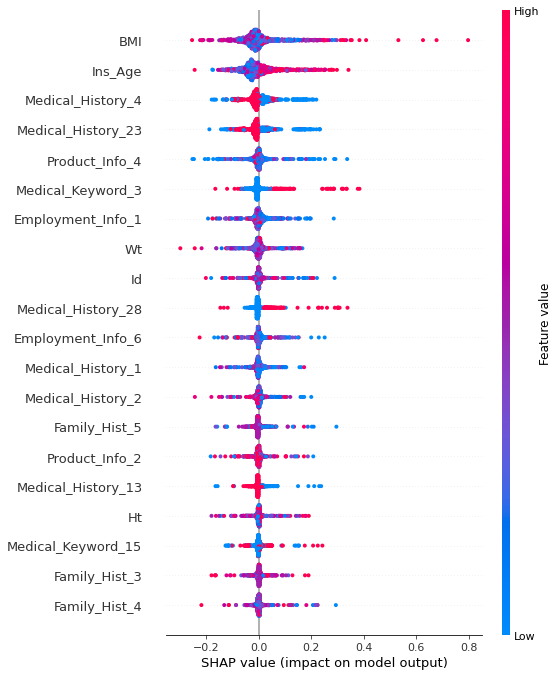

In [28]:
# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test[0:1000], check_additivity=False)

shap.summary_plot(shap_values[0], X_test[0:1000])

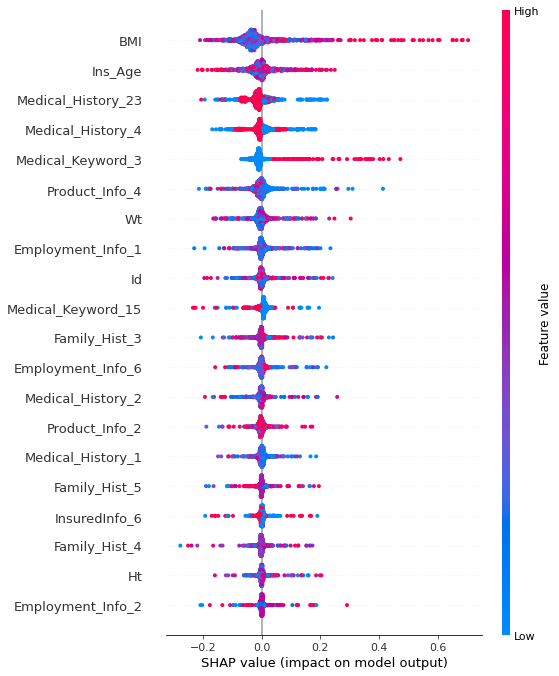

In [30]:
shap.summary_plot(shap_values[1], X_test[0:1000])

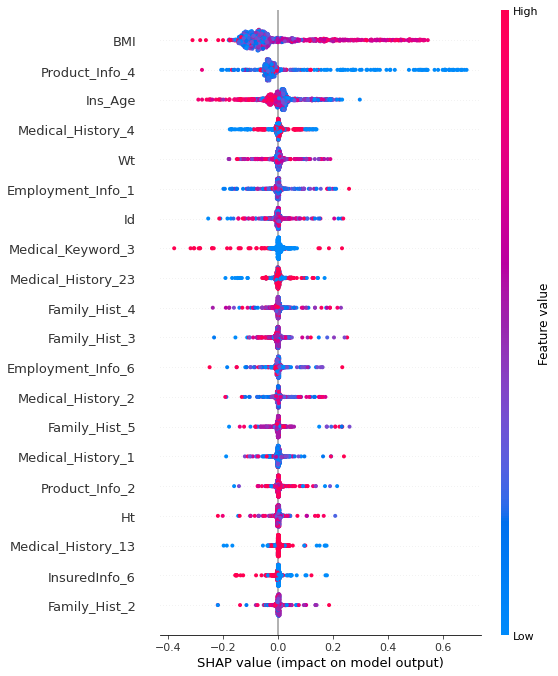

In [31]:
shap.summary_plot(shap_values[2], X_test[0:1000])

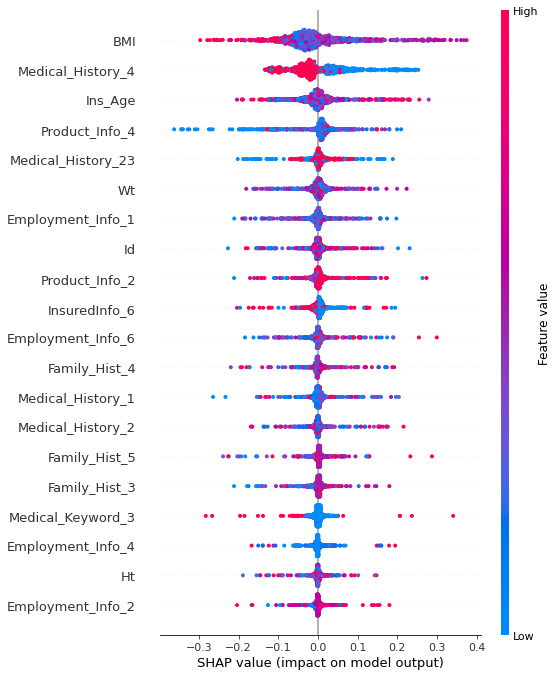

In [32]:
shap.summary_plot(shap_values[3], X_test[0:1000])

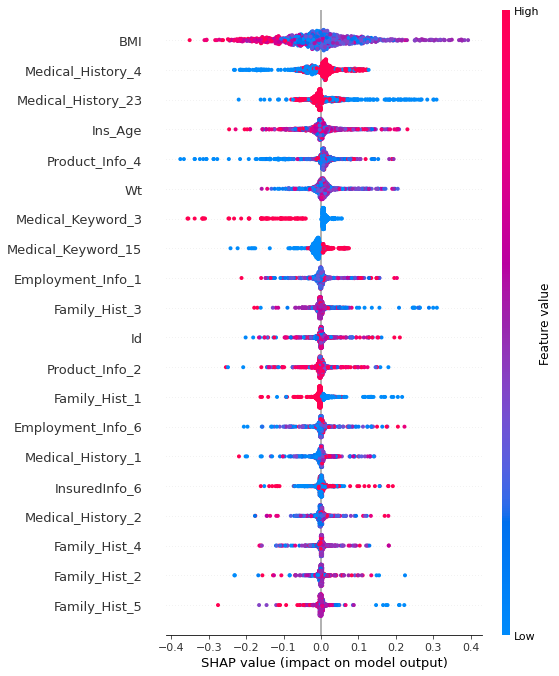

In [33]:
shap.summary_plot(shap_values[4], X_test[0:1000])

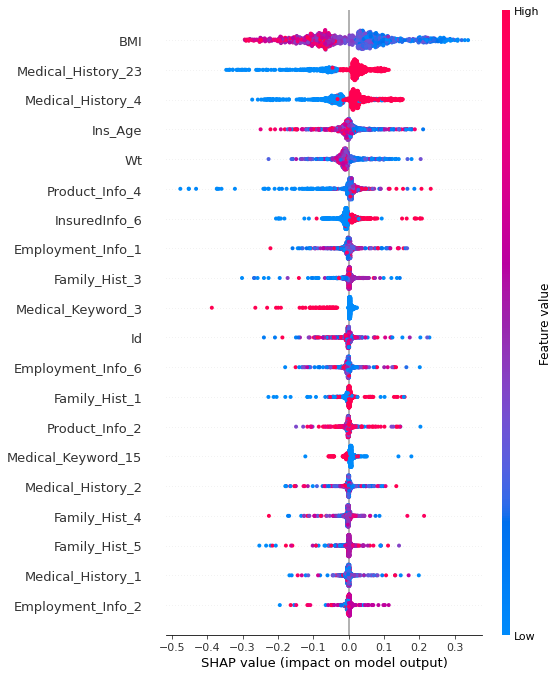

In [34]:
shap.summary_plot(shap_values[5], X_test[0:1000])